# Background

Relationship managers are a critical part of a high-performing banking team, in order to continuously fulfill customer needs while also ensuring the bank's profitability. Maybank's relationship managers are facing a number of business goals at once--they must bring in new customers, while also making sure those customers can increase their CASA usage and their investments. Branch managers are facing difficulty in making sure that each RM is fulfilling those three targets.

This assignment aims to help branch managers identify what strengths each of their relationship managers have, in order to efficiently assign target and goals for each relationship manager. This is done by building a K-Means Clustering model to segment the relationship managers into unique groups according to their strengths in CASA services, investment services, and new customer engagement.

# Problem Statement

1. What variables should be used to divide the branch managers into unique segments?
2. How many unique segments can the relationship managers be divided into?
2. What characteristics represent each unique segment of relationship managers?

To answer problem #1, this assignment will experiment clustering using four main variables that are derived from the original dataset of relationship managers available from the bank. The four variables represent the amount achieved from the set target of revenue, investments, CASA services, and new customer engagement. The calculation of each variable is done as follows (example for revenue).

Avg_Revenue_Achievement = (Revenue Score Q1 + Revenue Score Q2 + Revenue Score Q3 + Revenue Score Q4)/4

where each Revenue Score = Revenue Achieved / Target Revenue

# Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [3]:
df_rm = pd.read_csv('[BRI] Regression Training.csv', low_memory = False)

In [4]:
df_rm.head()

,Index,Year of Service,Q2 20 SC,Q2_Incentive,Grade,TOTAL REV_Jul20,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH
0,1,9,2.4600,8.786319e+07,11,8.794014e+08,4.832649,-0.346644,0.0,0.485597,750455620.8,0.26
1,2,10,3.2550,7.898679e+07,12,8.192389e+08,2.355982,-21.088729,0.5,0.712338,427931769.8,0.74
2,3,5,1.7825,2.166796e+07,11,7.793109e+08,0.907896,8.469858,0.0,0.723232,469477058.6,1.86
3,4,4,1.7875,1.398703e+08,12,2.084217e+09,4.331416,-9.162848,1.0,0.562074,824765897.9,0.97
4,5,8,1.9825,1.440724e+07,11,6.514022e+08,0.393369,11.763723,0.0,0.460099,426004328.0,1.14


In [5]:
df_rm.shape

(144, 12)

# EDA

In [6]:
df_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Index                         144 non-null    int64  
 1   Year of Service               144 non-null    int64  
 2   Q2 20 SC                      144 non-null    float64
 3   Q2_Incentive                  144 non-null    float64
 4   Grade                         144 non-null    int64  
 5   TOTAL REV_Jul20               144 non-null    float64
 6   Q2 20WM Revenue % Ach         144 non-null    float64
 7   Q2 20CASA Growth % Ach        144 non-null    float64
 8   TOTAL NQC/NTB %Ach_Jul20      144 non-null    float64
 9   TOTAL Mob_Banking %Ach_Jul20  144 non-null    float64
 10  Jul20_WM                      144 non-null    float64
 11  Jul20_CS ACH                  144 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 13.6 KB


In [7]:
df_rm['Index'] = df_rm['Index'].astype(str)
df_rm['Grade'] = df_rm['Grade'].astype(str)

In [8]:
df_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Index                         144 non-null    object 
 1   Year of Service               144 non-null    int64  
 2   Q2 20 SC                      144 non-null    float64
 3   Q2_Incentive                  144 non-null    float64
 4   Grade                         144 non-null    object 
 5   TOTAL REV_Jul20               144 non-null    float64
 6   Q2 20WM Revenue % Ach         144 non-null    float64
 7   Q2 20CASA Growth % Ach        144 non-null    float64
 8   TOTAL NQC/NTB %Ach_Jul20      144 non-null    float64
 9   TOTAL Mob_Banking %Ach_Jul20  144 non-null    float64
 10  Jul20_WM                      144 non-null    float64
 11  Jul20_CS ACH                  144 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 13.6+ KB


In [9]:
df_rm.isna().sum()

Index                           0
Year of Service                 0
Q2 20 SC                        0
Q2_Incentive                    0
Grade                           0
TOTAL REV_Jul20                 0
Q2 20WM Revenue % Ach           0
Q2 20CASA Growth % Ach          0
TOTAL NQC/NTB %Ach_Jul20        0
TOTAL Mob_Banking %Ach_Jul20    0
Jul20_WM                        0
Jul20_CS ACH                    0
dtype: int64

In [10]:
df_rm.dropna(inplace = True)

In [11]:
df_rm.columns

Index(['Index', 'Year of Service', 'Q2 20 SC ', 'Q2_Incentive', 'Grade',
       'TOTAL REV_Jul20', 'Q2 20WM Revenue % Ach', 'Q2 20CASA Growth % Ach',
       'TOTAL NQC/NTB %Ach_Jul20', 'TOTAL Mob_Banking %Ach_Jul20', 'Jul20_WM',
       'Jul20_CS ACH'],
      dtype='object')

In [12]:
rm_grade = df_rm['Grade']

In [13]:
grade = pd.get_dummies(df_rm, columns = ['Grade'])
grade.head()

,Index,Year of Service,Q2 20 SC,Q2_Incentive,TOTAL REV_Jul20,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH,Grade_10,Grade_11,Grade_12
0,1,9,2.4600,8.786319e+07,8.794014e+08,4.832649,-0.346644,0.0,0.485597,750455620.8,0.26,0,1,0
1,2,10,3.2550,7.898679e+07,8.192389e+08,2.355982,-21.088729,0.5,0.712338,427931769.8,0.74,0,0,1
2,3,5,1.7825,2.166796e+07,7.793109e+08,0.907896,8.469858,0.0,0.723232,469477058.6,1.86,0,1,0
3,4,4,1.7875,1.398703e+08,2.084217e+09,4.331416,-9.162848,1.0,0.562074,824765897.9,0.97,0,0,1
4,5,8,1.9825,1.440724e+07,6.514022e+08,0.393369,11.763723,0.0,0.460099,426004328.0,1.14,0,1,0


# Descriptive

In [14]:
#Cek apakah distribusi normal sehingga tidak perlu dilakukan adjustment data
def distributions(df):
    fig, (ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(9,1, figsize=(8,18))
    sns.distplot(df['Year of Service'], ax=ax1)
    sns.distplot(df['Grade'], ax=ax2)
    sns.distplot(df['Jul20_WM'], ax=ax3)
    sns.distplot(df['Q2 20 SC '], ax=ax4)
    sns.distplot(df['Q2 20WM Revenue % Ach'], ax=ax5)
    sns.distplot(df['Q2 20CASA Growth % Ach'], ax=ax6)
    sns.distplot(df['TOTAL NQC/NTB %Ach_Jul20'], ax=ax7)
    sns.distplot(df['TOTAL Mob_Banking %Ach_Jul20'], ax=ax8)
    sns.distplot(df['Jul20_CS ACH'], ax=ax9)
    
    plt.tight_layout()

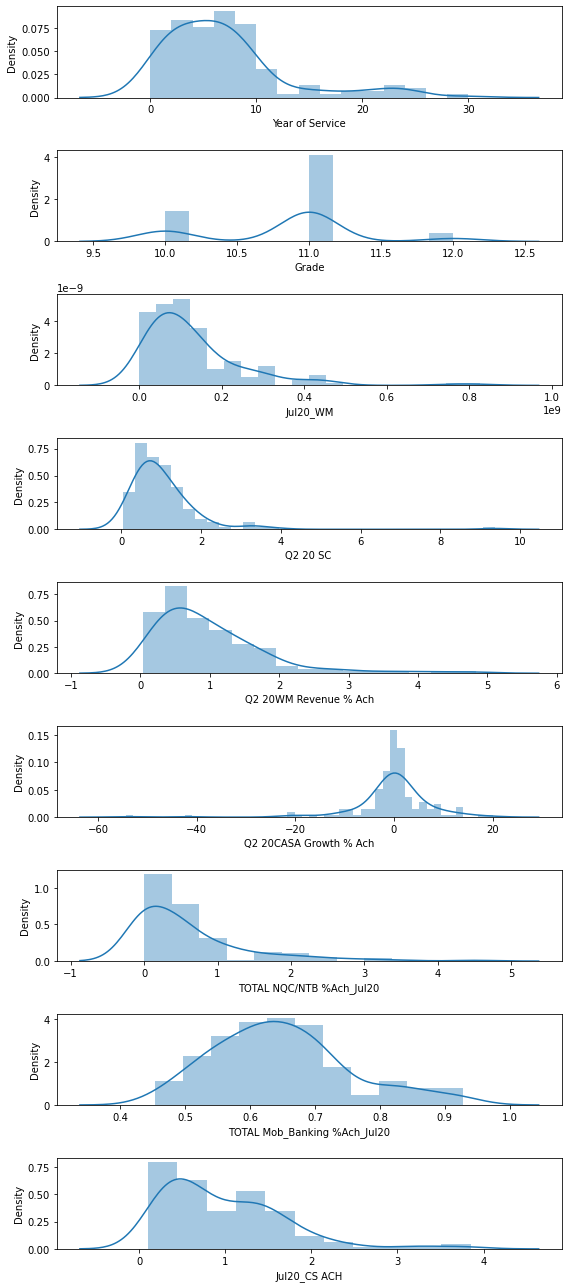

In [15]:
distributions(df_rm)

# Experiment #1: Variables Investment, Revenue, New Customer, and CASA Achievement

## Data Preparation

In [16]:
cluster = df_rm[['Year of Service', 'Q2 20 SC ', 'Q2 20WM Revenue % Ach', 'Q2 20CASA Growth % Ach',
       'TOTAL NQC/NTB %Ach_Jul20', 'TOTAL Mob_Banking %Ach_Jul20', 'Jul20_WM',
       'Jul20_CS ACH']]

In [17]:
cluster.head()

,Year of Service,Q2 20 SC,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH
0,9,2.4600,4.832649,-0.346644,0.0,0.485597,750455620.8,0.26
1,10,3.2550,2.355982,-21.088729,0.5,0.712338,427931769.8,0.74
2,5,1.7825,0.907896,8.469858,0.0,0.723232,469477058.6,1.86
3,4,1.7875,4.331416,-9.162848,1.0,0.562074,824765897.9,0.97
4,8,1.9825,0.393369,11.763723,0.0,0.460099,426004328.0,1.14


In [18]:
#Scaling the Numeric Variables
sc=StandardScaler()
cluster_scaled = pd.DataFrame(sc.fit_transform(cluster))
cluster_scaled.columns=cluster.columns
cluster_scaled.head()

,Year of Service,Q2 20 SC,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH
0,0.347578,1.453310,4.718687,0.015799,-0.747235,-1.567081,4.810747,-1.014103
1,0.516101,2.271548,1.671304,-2.461408,-0.110538,0.606300,2.294883,-0.337882
2,-0.326513,0.756007,-0.110475,1.068745,-0.747235,0.710724,2.618959,1.239967
3,-0.495036,0.761153,4.101951,-1.037111,0.526159,-0.834020,5.390409,-0.013860
4,0.179055,0.961853,-0.743567,1.462128,-0.747235,-1.811481,2.279847,0.225635


In [19]:
df_new = pd.concat([cluster_scaled, grade[['Grade_10','Grade_11','Grade_12']]], axis=1)

In [20]:
df_new.head()

,Year of Service,Q2 20 SC,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH,Grade_10,Grade_11,Grade_12
0,0.347578,1.453310,4.718687,0.015799,-0.747235,-1.567081,4.810747,-1.014103,0,1,0
1,0.516101,2.271548,1.671304,-2.461408,-0.110538,0.606300,2.294883,-0.337882,0,0,1
2,-0.326513,0.756007,-0.110475,1.068745,-0.747235,0.710724,2.618959,1.239967,0,1,0
3,-0.495036,0.761153,4.101951,-1.037111,0.526159,-0.834020,5.390409,-0.013860,0,0,1
4,0.179055,0.961853,-0.743567,1.462128,-0.747235,-1.811481,2.279847,0.225635,0,1,0


## Elbow Curve

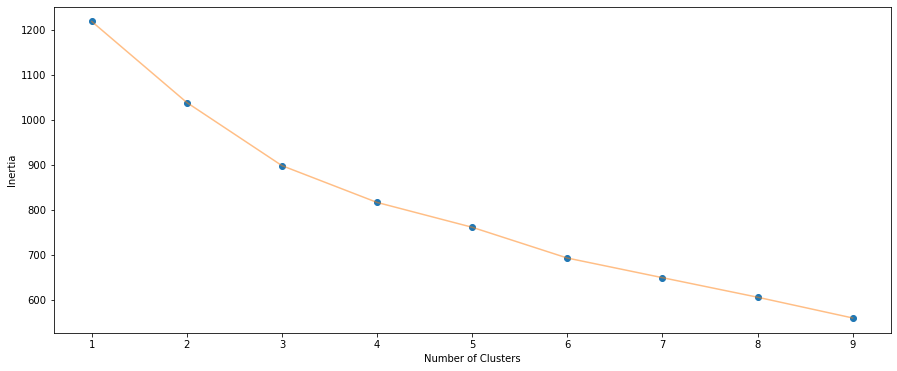

In [21]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 10) , wcss , 'o')
plt.plot(np.arange(1 , 10) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

plt.show()


## Clustering K-Means K=2

In [22]:
kmeans = KMeans(n_clusters=2, random_state = 42)
kmeans.fit(df_new)
mapping_dict = { 0: 'Cluster 1', 1: 'Cluster 2'}
mapped_predictions = [ mapping_dict[x] for x in kmeans.labels_]
df_rm['Cluster_KM_2']=mapped_predictions
df_rm.head()

,Index,Year of Service,Q2 20 SC,Q2_Incentive,Grade,TOTAL REV_Jul20,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH,Cluster_KM_2
0,1,9,2.4600,8.786319e+07,11,8.794014e+08,4.832649,-0.346644,0.0,0.485597,750455620.8,0.26,Cluster 2
1,2,10,3.2550,7.898679e+07,12,8.192389e+08,2.355982,-21.088729,0.5,0.712338,427931769.8,0.74,Cluster 2
2,3,5,1.7825,2.166796e+07,11,7.793109e+08,0.907896,8.469858,0.0,0.723232,469477058.6,1.86,Cluster 2
3,4,4,1.7875,1.398703e+08,12,2.084217e+09,4.331416,-9.162848,1.0,0.562074,824765897.9,0.97,Cluster 2
4,5,8,1.9825,1.440724e+07,11,6.514022e+08,0.393369,11.763723,0.0,0.460099,426004328.0,1.14,Cluster 1


In [23]:
grouped_km = df_rm.groupby(['Cluster_KM_2']).mean().round(1)
grouped_km

,Year of Service,Q2 20 SC,Q2_Incentive,TOTAL REV_Jul20,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH
Cluster_KM_2,,,,,,,,,,
Cluster 1,7.1,0.7,6301903.7,280506597.6,0.7,-0.1,0.3,0.6,97948974.7,0.7
Cluster 2,6.5,1.7,24716121.9,463079880.3,1.6,-1.3,1.1,0.7,207597344.8,1.5


In [24]:
def scatters(data=df_rm, h=None, pal=None):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8,1, figsize=(10,25))
    sns.scatterplot(x="Year of Service",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Q2 20WM Revenue % Ach",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Q2 20CASA Growth % Ach",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax3)
    sns.scatterplot(x="TOTAL NQC/NTB %Ach_Jul20",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax4)
    sns.scatterplot(x="TOTAL Mob_Banking %Ach_Jul20",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax5)
    sns.scatterplot(x="Jul20_WM",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax6)
    sns.scatterplot(x="Jul20_CS ACH",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax7)
    sns.scatterplot(x="Grade",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax8)
    plt.tight_layout()

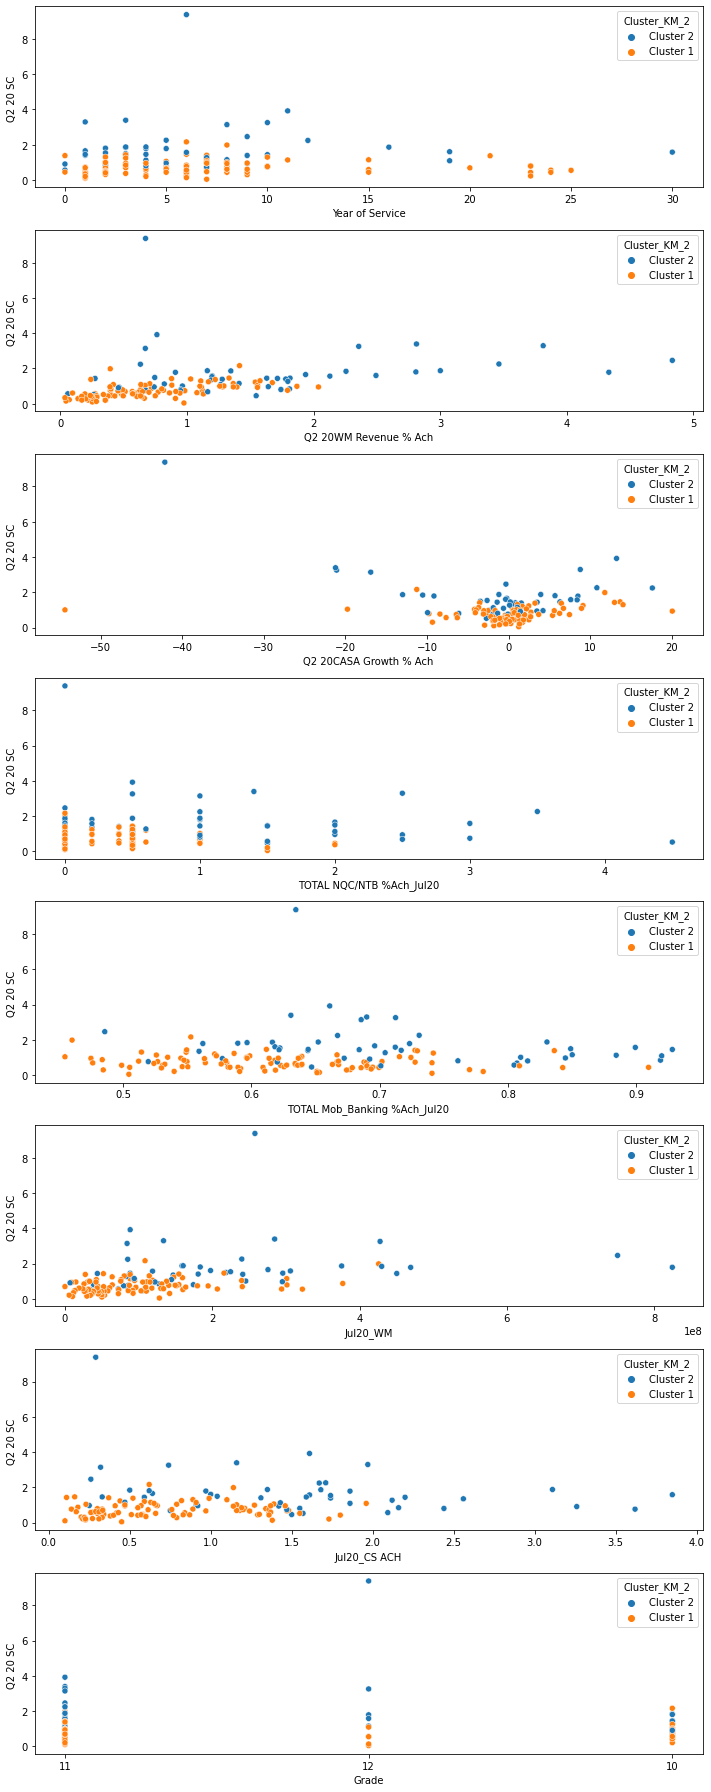

In [25]:
scatters(h = "Cluster_KM_2")

## Clustering K-Means K=4

In [26]:
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(df_new)
mapping_dict = { 0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'}
mapped_predictions = [ mapping_dict[x] for x in kmeans.labels_]
df_rm['Cluster_KM_4']=mapped_predictions
df_rm.head()

,Index,Year of Service,Q2 20 SC,Q2_Incentive,Grade,TOTAL REV_Jul20,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH,Cluster_KM_2,Cluster_KM_4
0,1,9,2.4600,8.786319e+07,11,8.794014e+08,4.832649,-0.346644,0.0,0.485597,750455620.8,0.26,Cluster 2,Cluster 4
1,2,10,3.2550,7.898679e+07,12,8.192389e+08,2.355982,-21.088729,0.5,0.712338,427931769.8,0.74,Cluster 2,Cluster 4
2,3,5,1.7825,2.166796e+07,11,7.793109e+08,0.907896,8.469858,0.0,0.723232,469477058.6,1.86,Cluster 2,Cluster 1
3,4,4,1.7875,1.398703e+08,12,2.084217e+09,4.331416,-9.162848,1.0,0.562074,824765897.9,0.97,Cluster 2,Cluster 4
4,5,8,1.9825,1.440724e+07,11,6.514022e+08,0.393369,11.763723,0.0,0.460099,426004328.0,1.14,Cluster 1,Cluster 3


In [27]:
grouped_km = df_rm.groupby(['Cluster_KM_4']).mean().round(1)
grouped_km

,Year of Service,Q2 20 SC,Q2_Incentive,TOTAL REV_Jul20,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH
Cluster_KM_4,,,,,,,,,,
Cluster 1,4.5,1.1,14313844.2,356473454.2,1.3,1.2,1.4,0.7,137156179.3,1.6
Cluster 2,19.8,1.1,13809577.3,391118098.5,0.8,3.5,0.6,0.6,140122195.9,1.1
Cluster 3,5.1,0.8,6620300.5,276671466.7,0.8,0.2,0.3,0.6,99813807.1,0.7
Cluster 4,7.0,3.0,51022174.3,728621483.4,2.2,-19.0,0.7,0.6,396256869.2,0.7


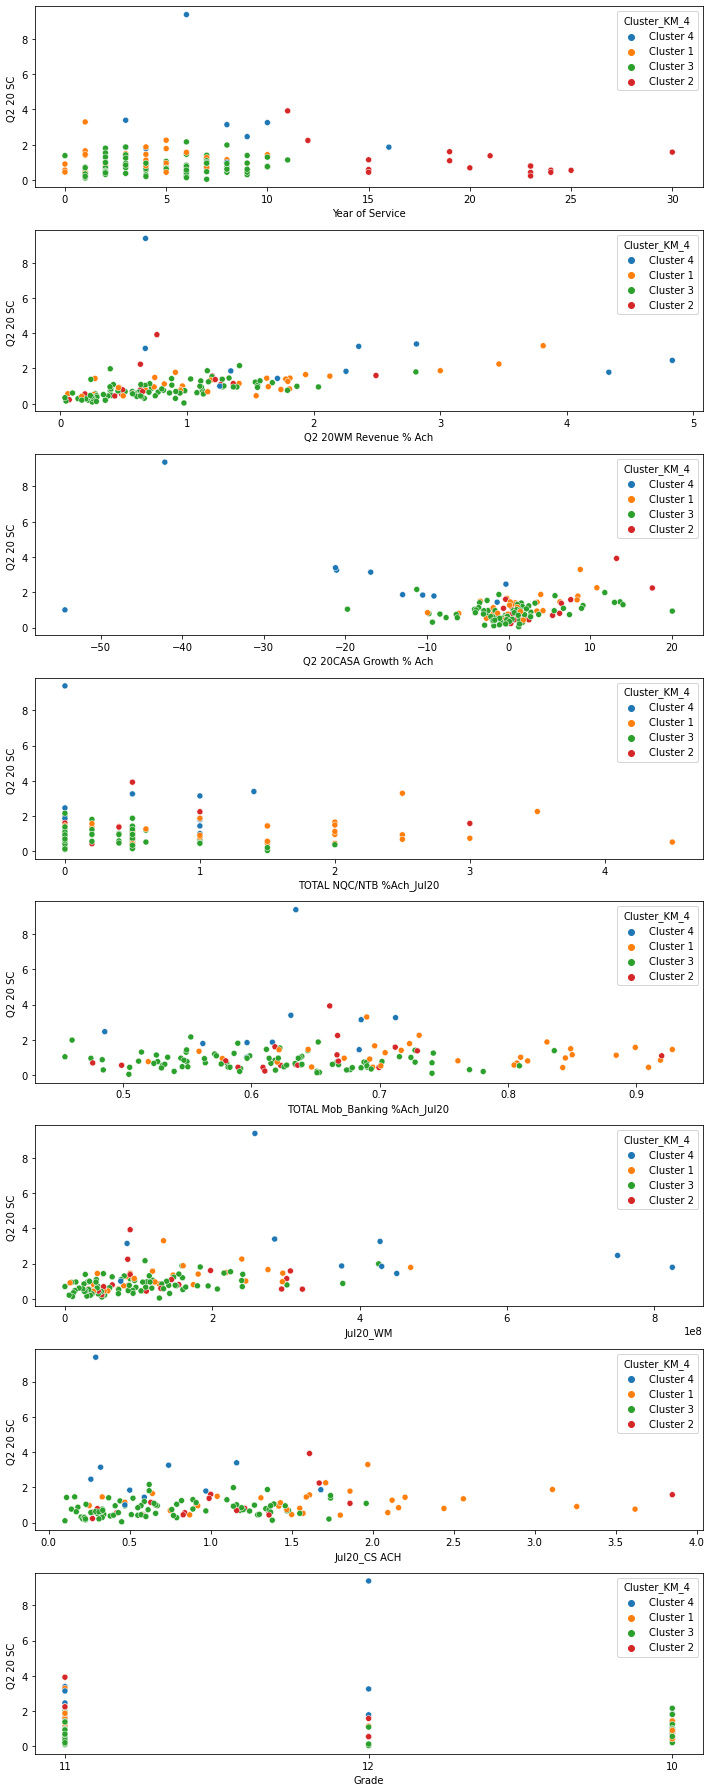

In [28]:
scatters(h = "Cluster_KM_4")

In [29]:
nama_var = cluster.columns

# Experiment #2: Yeo Johnson

In [30]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method= 'yeo-johnson')
cluster = pd.DataFrame(pt.fit_transform(cluster))
cluster.head()

,0,1,2,3,4,5,6,7
0,0.638472,1.651414,2.413452,-0.146185,-1.096047,-1.852588,2.857604,-1.311492
1,0.775836,1.999958,1.549601,-2.060504,0.354277,0.700187,1.888233,-0.123041
2,-0.072351,1.198697,0.192890,1.375661,-1.096047,0.792321,2.037591,1.265729
3,-0.316002,1.202837,2.296767,-1.051389,1.003836,-0.833378,3.036404,0.269009
4,0.488385,1.353566,-0.859925,2.039785,-1.096047,-2.238398,1.881057,0.512612


In [31]:
cluster.columns = nama_var
cluster.head()

,Year of Service,Q2 20 SC,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH
0,0.638472,1.651414,2.413452,-0.146185,-1.096047,-1.852588,2.857604,-1.311492
1,0.775836,1.999958,1.549601,-2.060504,0.354277,0.700187,1.888233,-0.123041
2,-0.072351,1.198697,0.192890,1.375661,-1.096047,0.792321,2.037591,1.265729
3,-0.316002,1.202837,2.296767,-1.051389,1.003836,-0.833378,3.036404,0.269009
4,0.488385,1.353566,-0.859925,2.039785,-1.096047,-2.238398,1.881057,0.512612


In [32]:
df_new2 = pd.concat([cluster, grade[['Grade_10','Grade_11','Grade_12']]], axis=1)

In [33]:
df_new2.head()

,Year of Service,Q2 20 SC,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH,Grade_10,Grade_11,Grade_12
0,0.638472,1.651414,2.413452,-0.146185,-1.096047,-1.852588,2.857604,-1.311492,0,1,0
1,0.775836,1.999958,1.549601,-2.060504,0.354277,0.700187,1.888233,-0.123041,0,0,1
2,-0.072351,1.198697,0.192890,1.375661,-1.096047,0.792321,2.037591,1.265729,0,1,0
3,-0.316002,1.202837,2.296767,-1.051389,1.003836,-0.833378,3.036404,0.269009,0,0,1
4,0.488385,1.353566,-0.859925,2.039785,-1.096047,-2.238398,1.881057,0.512612,0,1,0


#  Clustering K-Means K=2

In [34]:
kmeans = KMeans(n_clusters=2, random_state = 42)
kmeans.fit(df_new2)
mapping_dict = { 0: 'Cluster 1', 1: 'Cluster 2'}
mapped_predictions = [ mapping_dict[x] for x in kmeans.labels_]
df_rm['Cluster_KM_2']=mapped_predictions
df_rm.head()

,Index,Year of Service,Q2 20 SC,Q2_Incentive,Grade,TOTAL REV_Jul20,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH,Cluster_KM_2,Cluster_KM_4
0,1,9,2.4600,8.786319e+07,11,8.794014e+08,4.832649,-0.346644,0.0,0.485597,750455620.8,0.26,Cluster 2,Cluster 4
1,2,10,3.2550,7.898679e+07,12,8.192389e+08,2.355982,-21.088729,0.5,0.712338,427931769.8,0.74,Cluster 2,Cluster 4
2,3,5,1.7825,2.166796e+07,11,7.793109e+08,0.907896,8.469858,0.0,0.723232,469477058.6,1.86,Cluster 2,Cluster 1
3,4,4,1.7875,1.398703e+08,12,2.084217e+09,4.331416,-9.162848,1.0,0.562074,824765897.9,0.97,Cluster 2,Cluster 4
4,5,8,1.9825,1.440724e+07,11,6.514022e+08,0.393369,11.763723,0.0,0.460099,426004328.0,1.14,Cluster 2,Cluster 3


In [35]:
grouped_km = df_rm.groupby(['Cluster_KM_2']).mean().round(1)
grouped_km

,Year of Service,Q2 20 SC,Q2_Incentive,TOTAL REV_Jul20,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH
Cluster_KM_2,,,,,,,,,,
Cluster 1,6.4,0.5,3960088.6,221084420.3,0.5,0.4,0.5,0.6,56543533.6,0.7
Cluster 2,7.4,1.4,18627035.3,430081222.9,1.4,-1.1,0.7,0.7,192102764.2,1.2


In [39]:
def scatters(data=df_rm, h=None, pal=None):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8,1, figsize=(8,20))
    sns.scatterplot(x="Year of Service",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Q2 20WM Revenue % Ach",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Q2 20CASA Growth % Ach",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax3)
    sns.scatterplot(x="TOTAL NQC/NTB %Ach_Jul20",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax4)
    sns.scatterplot(x="TOTAL Mob_Banking %Ach_Jul20",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax5)
    sns.scatterplot(x="Jul20_WM",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax6)
    sns.scatterplot(x="Jul20_CS ACH",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax7)
    sns.scatterplot(x="Grade",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax8)
    plt.tight_layout()

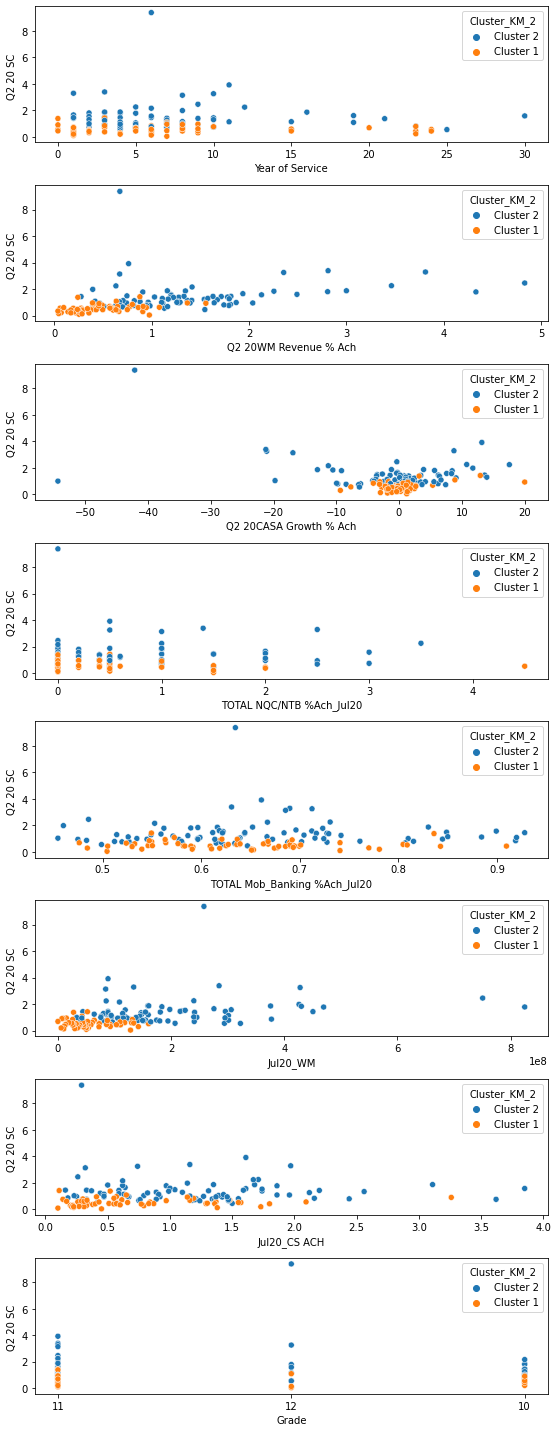

In [40]:
scatters(h = "Cluster_KM_2")


#  Clustering K-Means K=4

In [41]:
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(df_new2)
mapping_dict = { 0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'}
mapped_predictions = [ mapping_dict[x] for x in kmeans.labels_]
df_rm['Cluster_KM_4']=mapped_predictions
df_rm.head()

,Index,Year of Service,Q2 20 SC,Q2_Incentive,Grade,TOTAL REV_Jul20,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH,Cluster_KM_2,Cluster_KM_4
0,1,9,2.4600,8.786319e+07,11,8.794014e+08,4.832649,-0.346644,0.0,0.485597,750455620.8,0.26,Cluster 2,Cluster 3
1,2,10,3.2550,7.898679e+07,12,8.192389e+08,2.355982,-21.088729,0.5,0.712338,427931769.8,0.74,Cluster 2,Cluster 3
2,3,5,1.7825,2.166796e+07,11,7.793109e+08,0.907896,8.469858,0.0,0.723232,469477058.6,1.86,Cluster 2,Cluster 4
3,4,4,1.7875,1.398703e+08,12,2.084217e+09,4.331416,-9.162848,1.0,0.562074,824765897.9,0.97,Cluster 2,Cluster 3
4,5,8,1.9825,1.440724e+07,11,6.514022e+08,0.393369,11.763723,0.0,0.460099,426004328.0,1.14,Cluster 2,Cluster 3


In [42]:
grouped_km = df_rm.groupby(['Cluster_KM_4']).mean().round(1)
grouped_km

,Year of Service,Q2 20 SC,Q2_Incentive,TOTAL REV_Jul20,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH
Cluster_KM_4,,,,,,,,,,
Cluster 1,1.9,0.4,1811300.4,187105595.7,0.4,0.1,0.8,0.7,48519112.2,0.8
Cluster 2,10.7,0.7,6372499.9,275249937.9,0.6,1.3,0.2,0.6,84422959.6,0.7
Cluster 3,6.8,1.7,22756441.1,501689705.2,1.6,-6.5,0.3,0.6,254167837.4,0.8
Cluster 4,6.6,1.3,17150869.6,377369753.9,1.4,2.7,1.1,0.7,141408658.9,1.6


In [43]:
def scatters(data=df_rm, h=None, pal=None):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8,1, figsize=(8,20))
    sns.scatterplot(x="Year of Service",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Q2 20WM Revenue % Ach",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Q2 20CASA Growth % Ach",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax3)
    sns.scatterplot(x="TOTAL NQC/NTB %Ach_Jul20",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax4)
    sns.scatterplot(x="TOTAL Mob_Banking %Ach_Jul20",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax5)
    sns.scatterplot(x="Jul20_WM",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax6)
    sns.scatterplot(x="Jul20_CS ACH",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax7)
    sns.scatterplot(x="Grade",y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax8)
    plt.tight_layout()

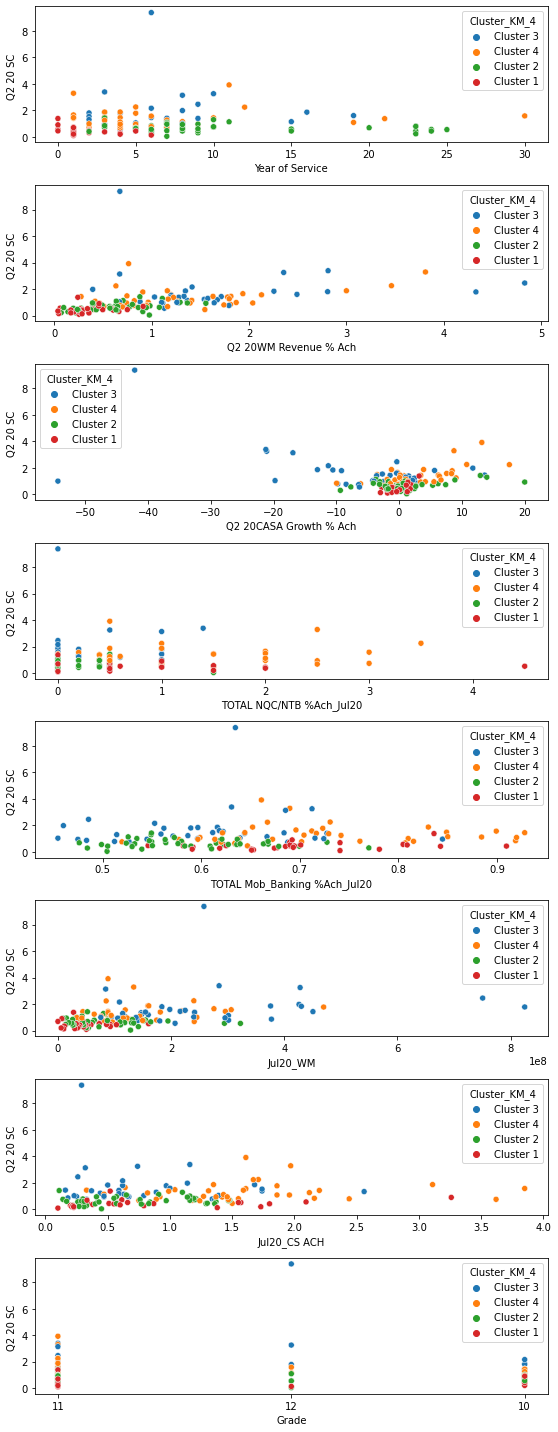

In [45]:
scatters(h = "Cluster_KM_4")

In [47]:
df_rm['Cluster_KM_2'].value_counts()

Cluster 2    82
Cluster 1    62
Name: Cluster_KM_2, dtype: int64